### The data analysis focuses on electric cars, examining key factors such as manufacturer, battery capacity, charging speed, top speed, and acceleration. By analyzing these attributes, we can better understand how they influence the overall cost of the vehicle.

In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("EV_cars.csv")

In [10]:
df

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery               360 non-null    float64
 1   Car_name              360 non-null    object 
 2   Car_name_link         360 non-null    object 
 3   Efficiency            360 non-null    int64  
 4   Fast_charge           358 non-null    float64
 5   Price.DE.             309 non-null    float64
 6   Range                 360 non-null    int64  
 7   Top_speed             360 non-null    int64  
 8   acceleration..0.100.  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [14]:
df.columns = df.columns.str.replace('.','_')

In [16]:
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


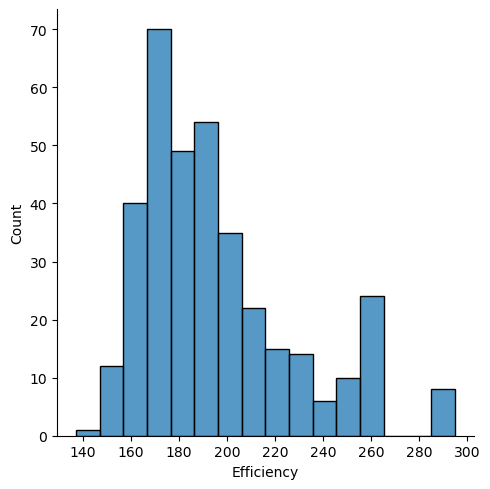

In [18]:
sns.displot(df, x = 'Efficiency')

In [20]:
import matplotlib.pyplot as plt

<Axes: >

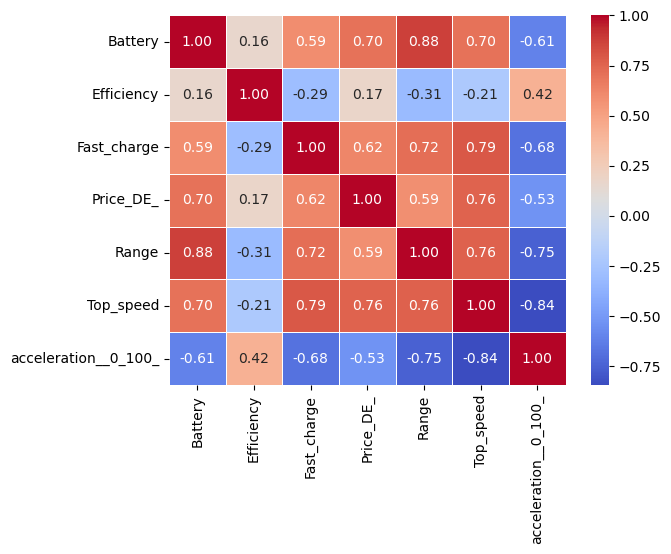

In [92]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Here, the most correlated values are of Battery-Range = 0.88

In [24]:
df.isnull().sum()

Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price_DE_               51
Range                    0
Top_speed                0
acceleration__0_100_     0
dtype: int64

In [26]:
df.dropna(inplace=True)

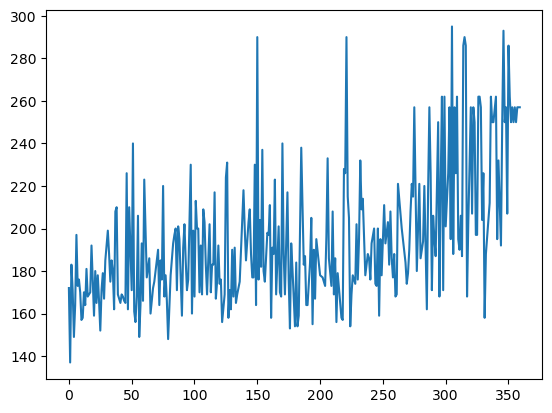

In [28]:
plt.plot(df['Efficiency'])

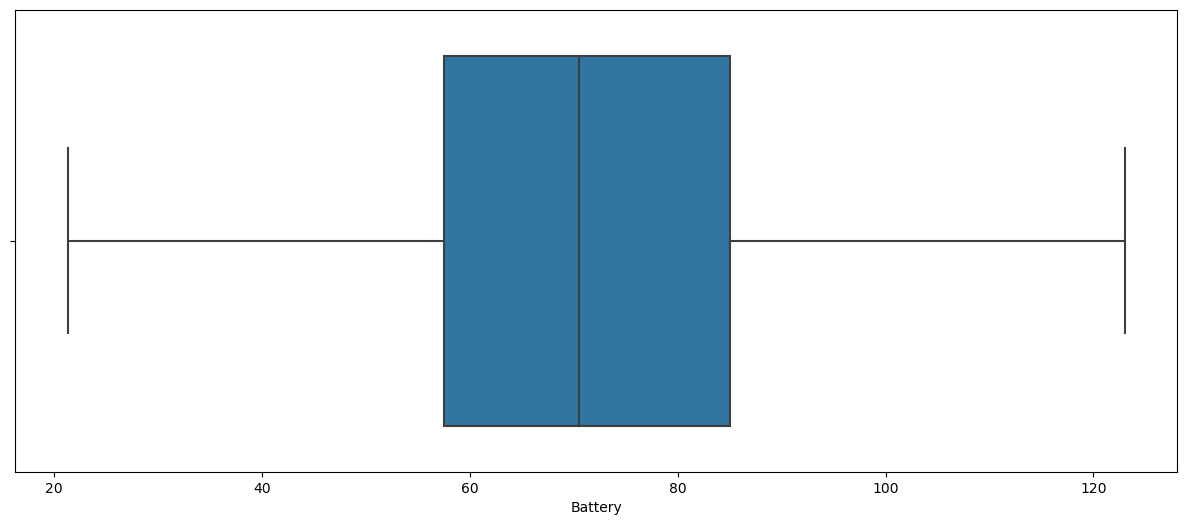

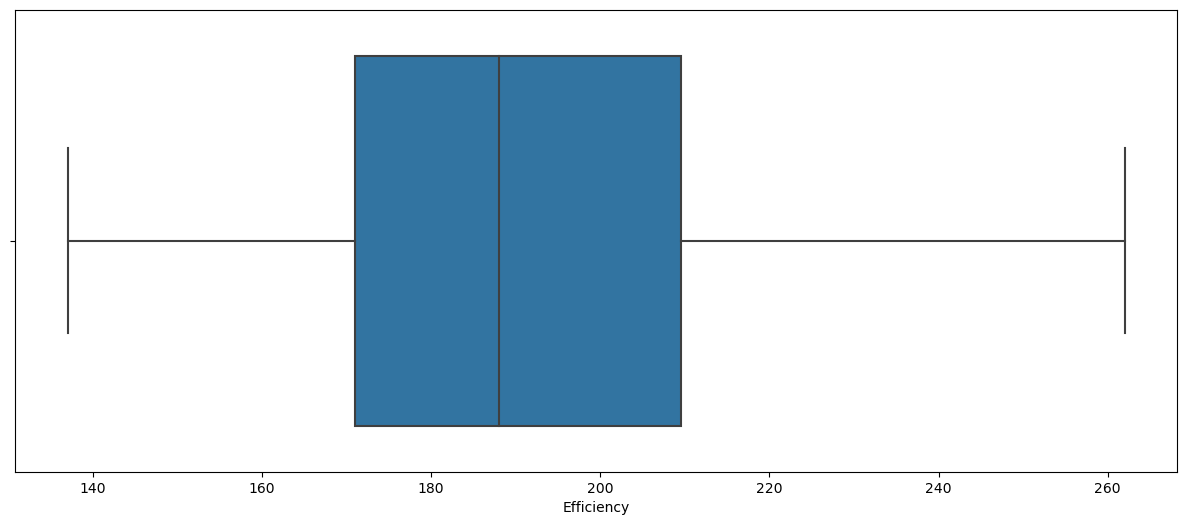

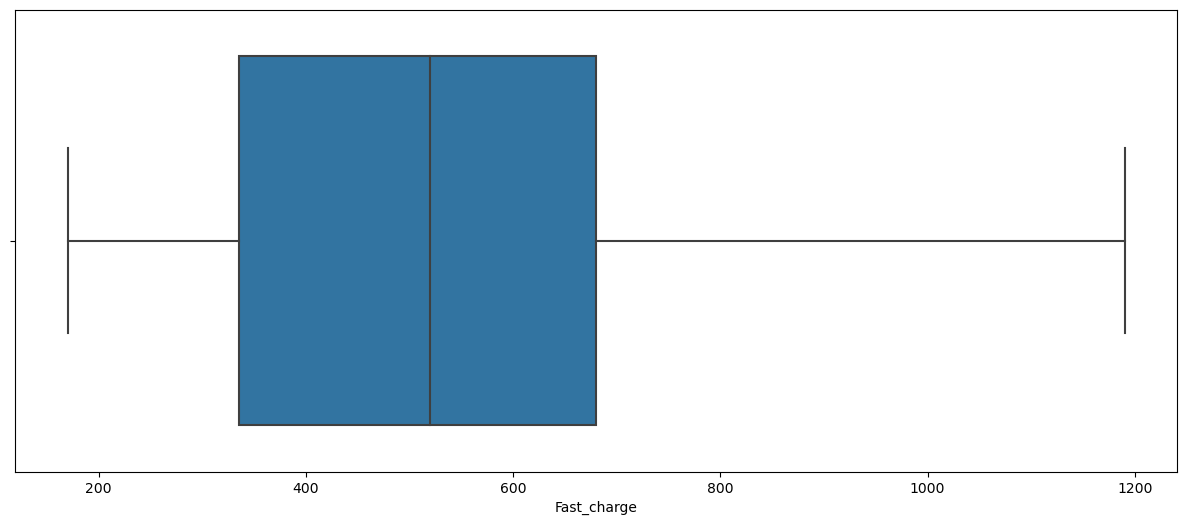

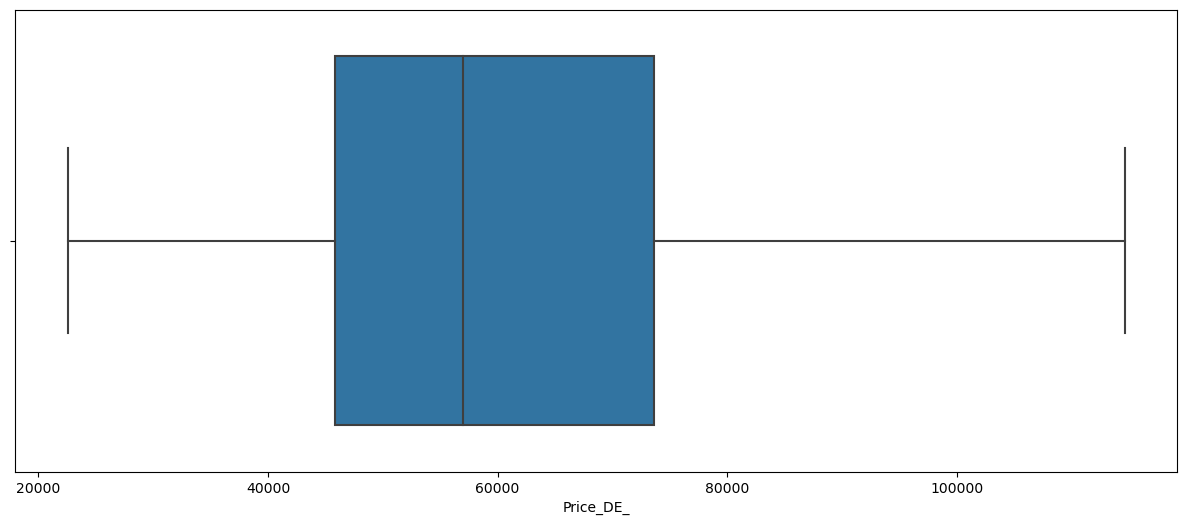

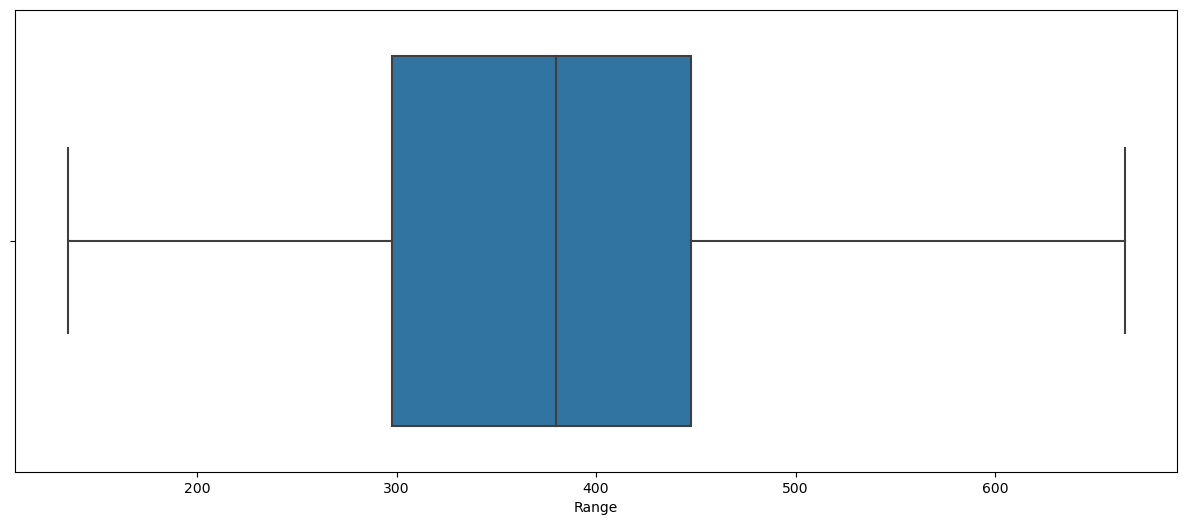

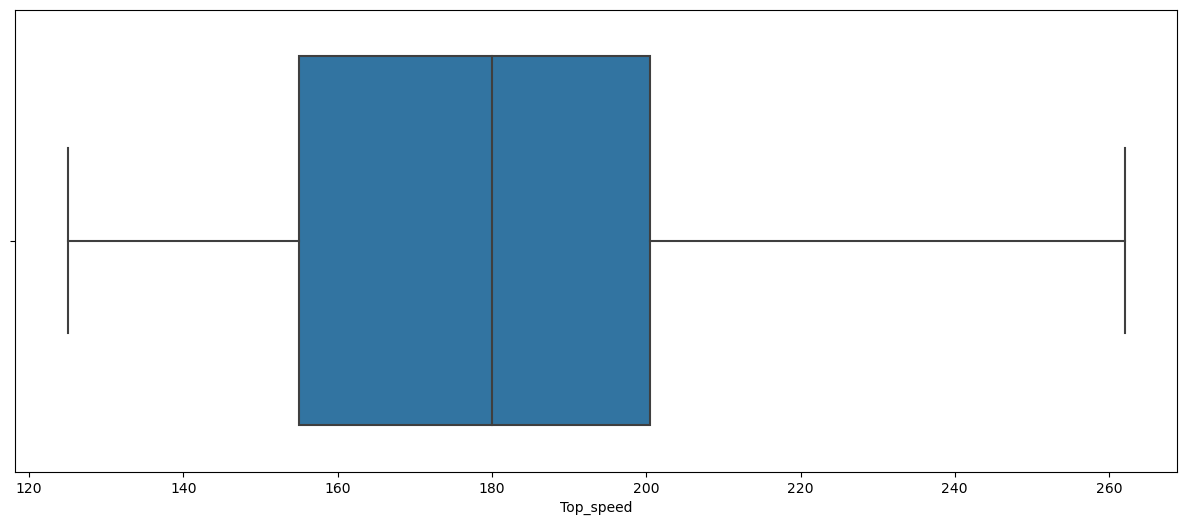

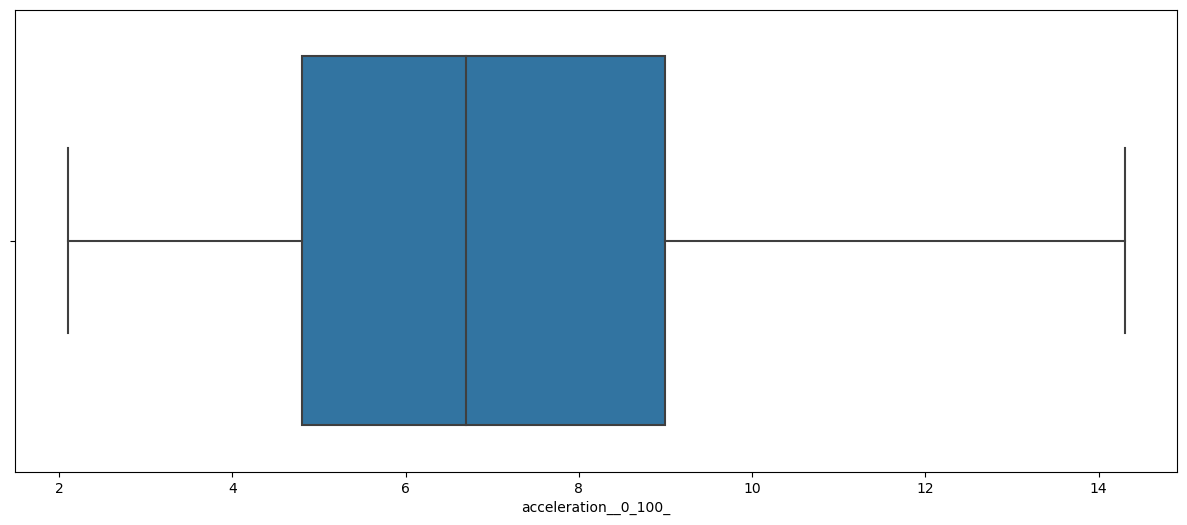

In [30]:
num_col = df.select_dtypes(include= ['int' , 'float']).columns

for i in  num_col:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i], showfliers = False)
    plt.show()

As we dont have any outliers we can proceed further.

In [32]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Number of unique values of {i} is:',df[i].nunique())

Number of unique values of Car_name is: 305
Number of unique values of Car_name_link is: 307


In [34]:
df1=df.drop(['Car_name','Car_name_link'], axis=1)

In [36]:
df1.groupby('Top_speed')['Price_DE_'].mean().sort_values(ascending=False).head(5)

Top_speed
270    198333.333333
260    158367.333333
240    133084.000000
250    130565.647059
262    115970.000000
Name: Price_DE_, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


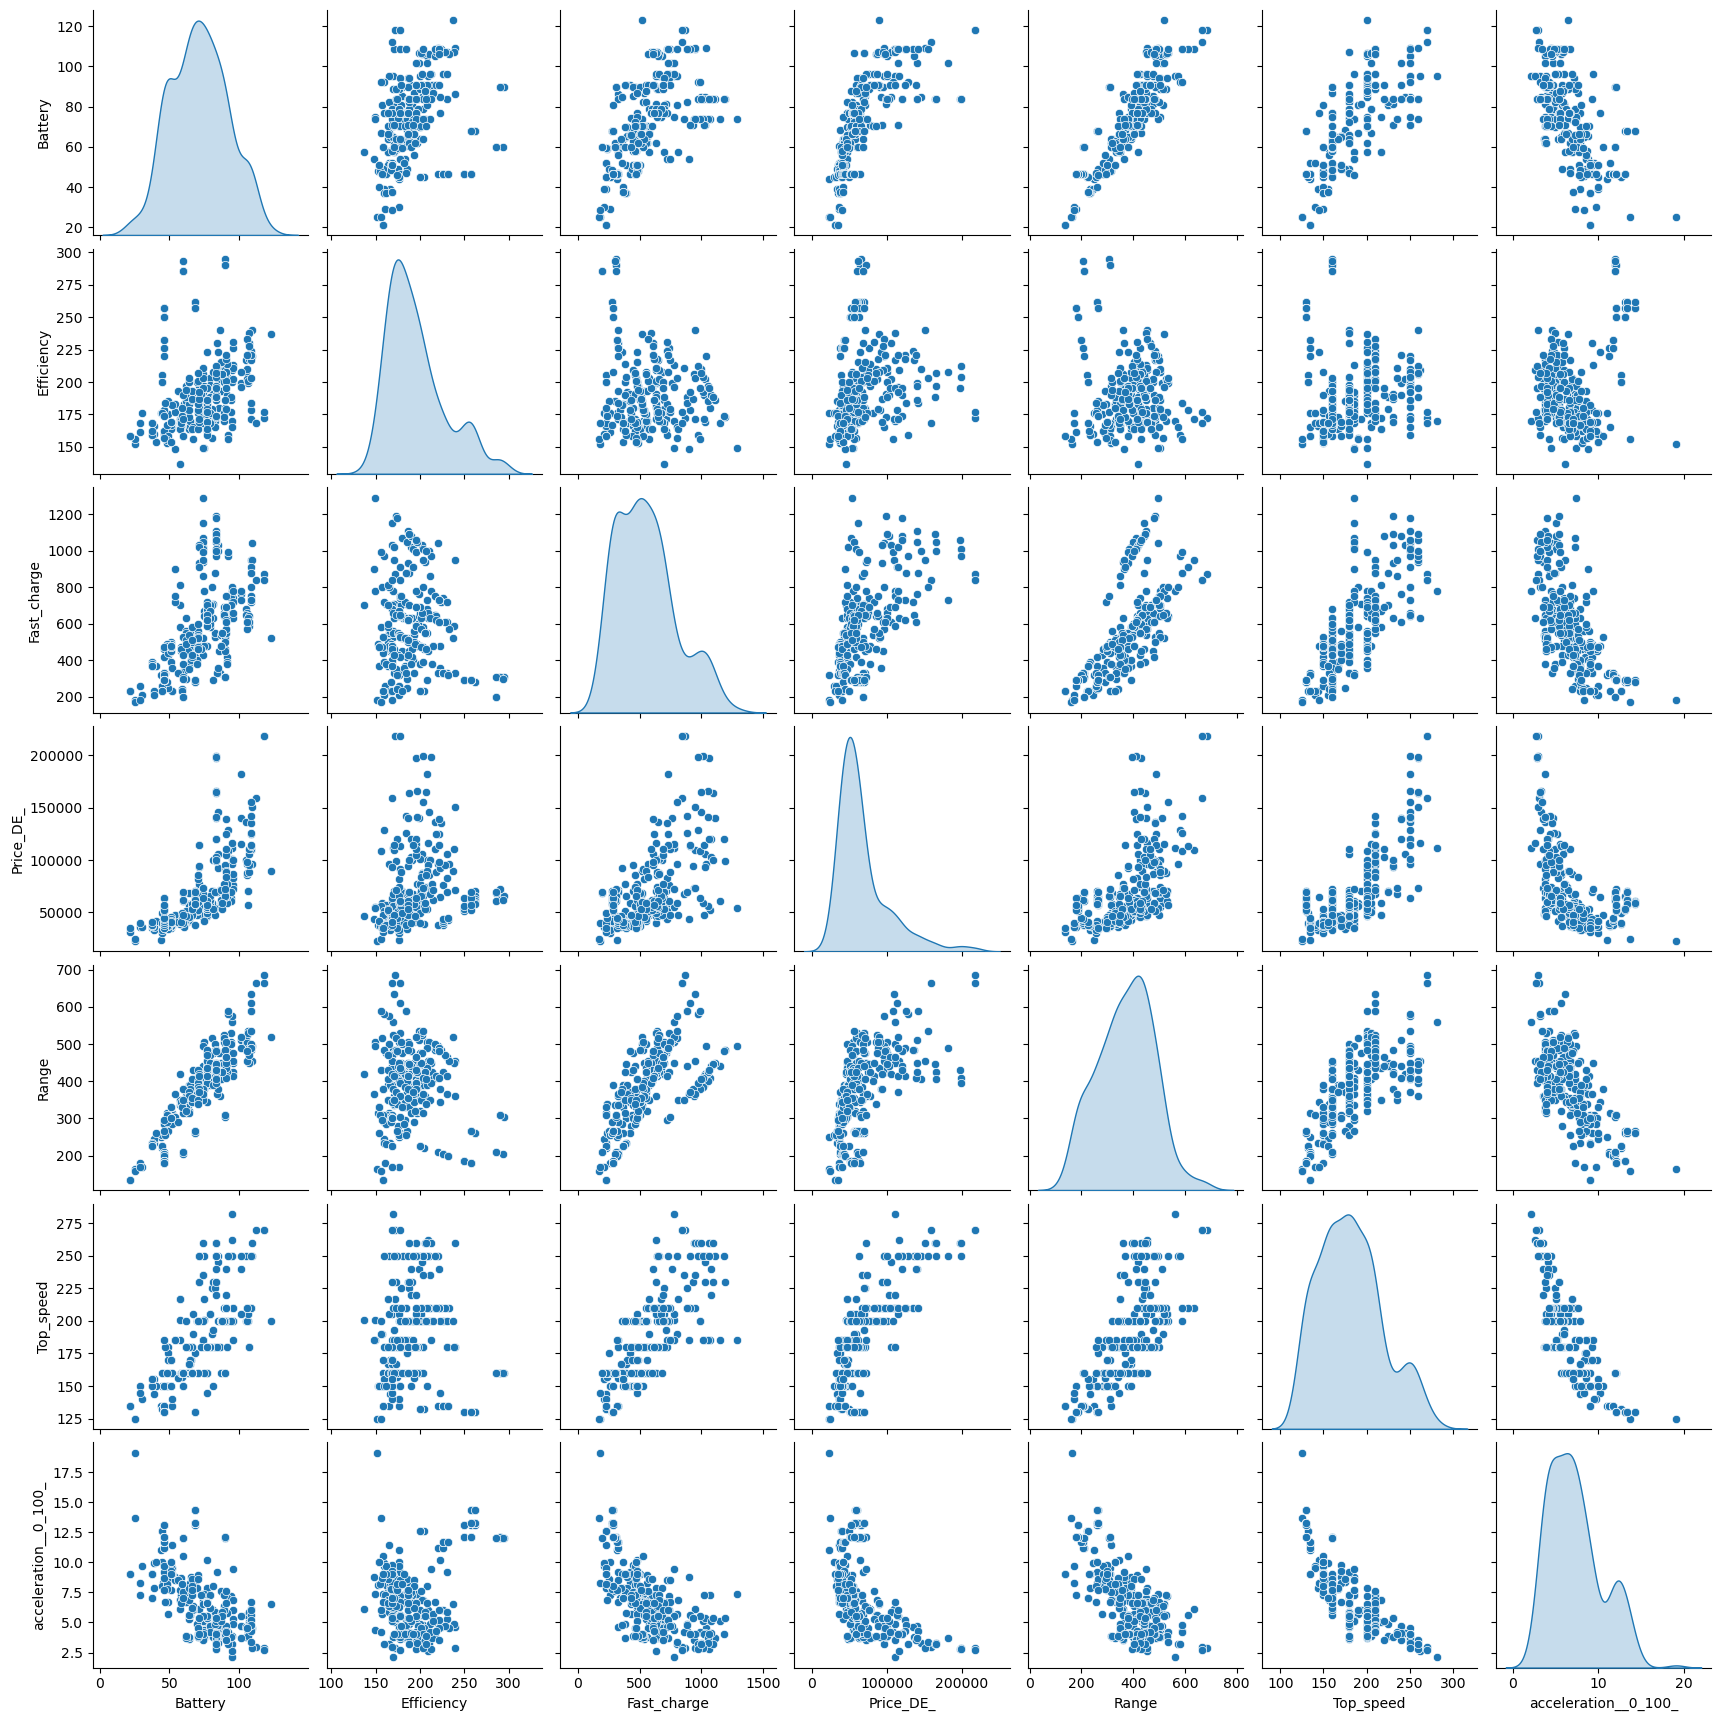

In [38]:
sns.pairplot(df1, diag_kind = 'kde')

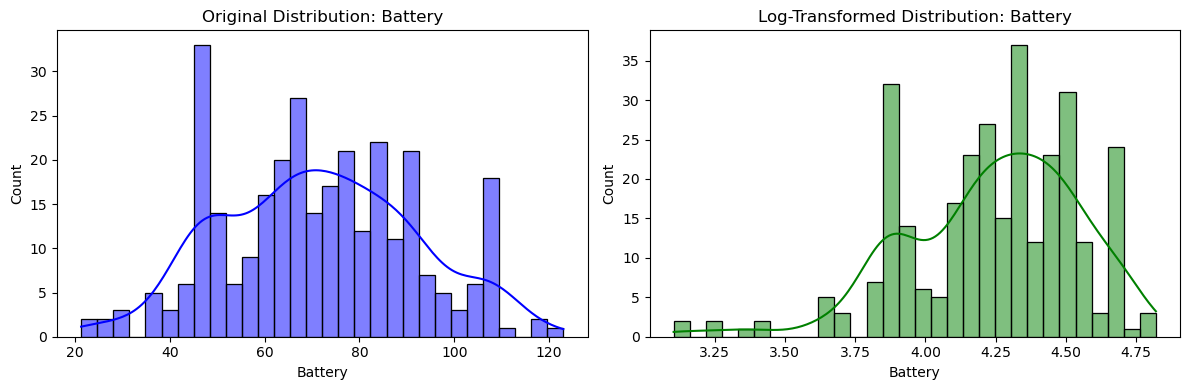

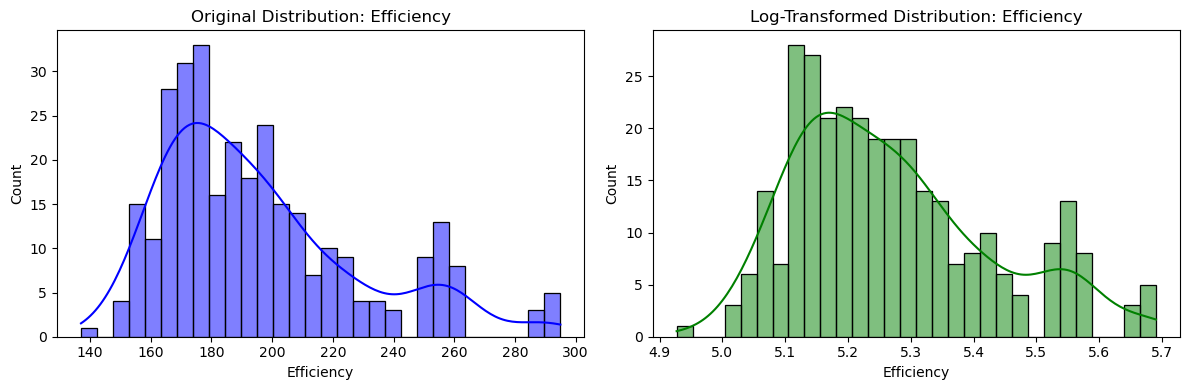

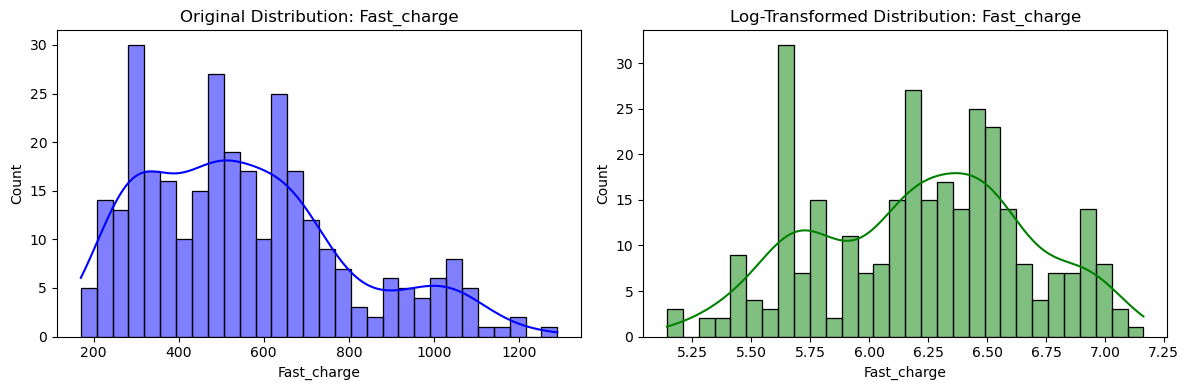

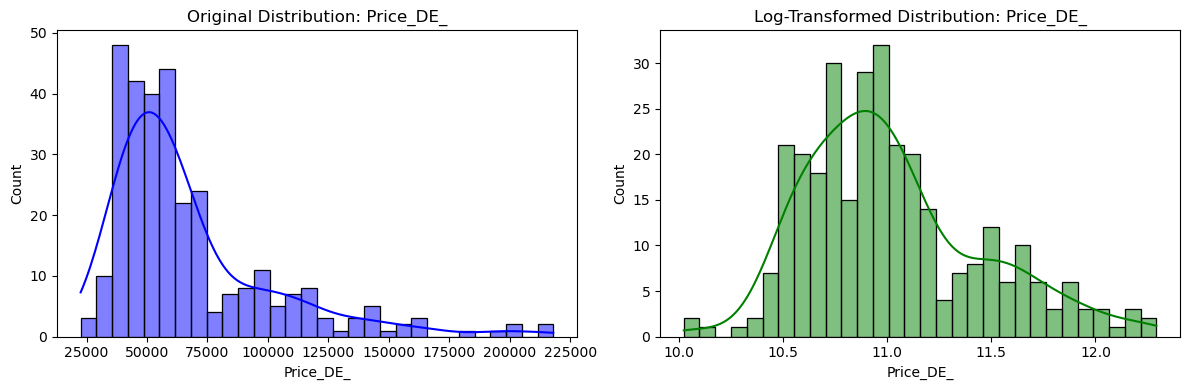

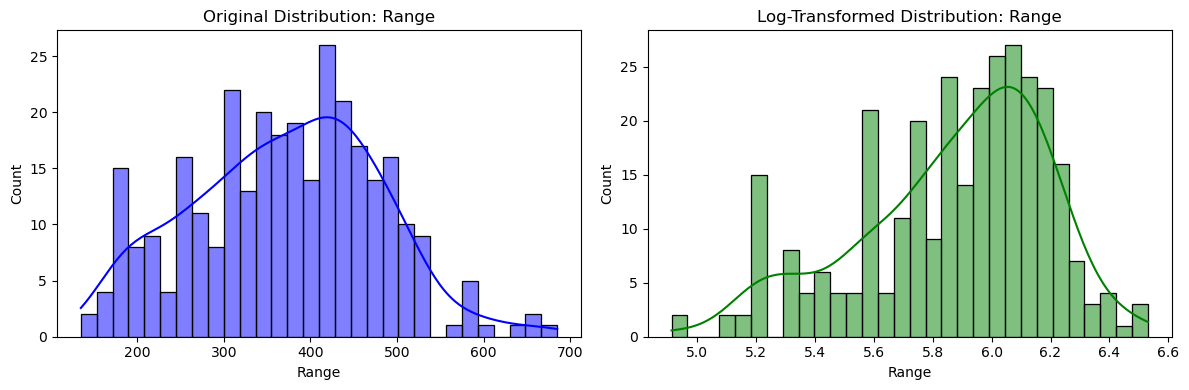

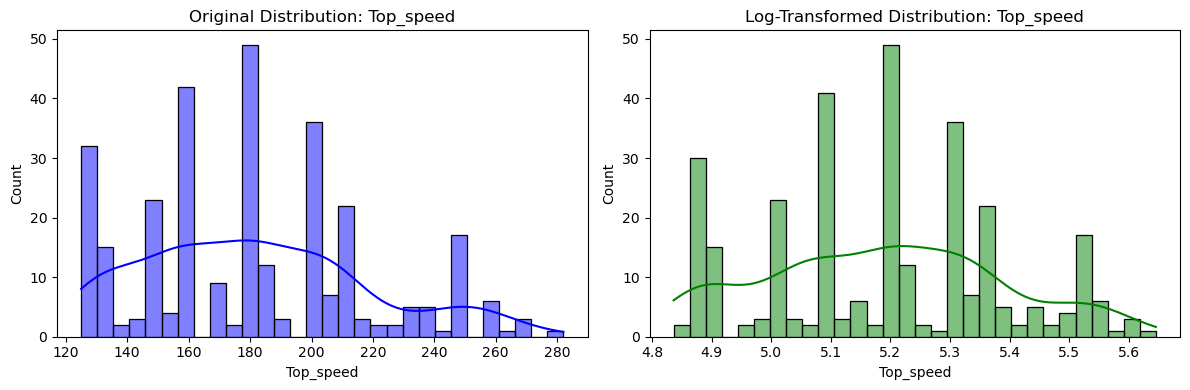

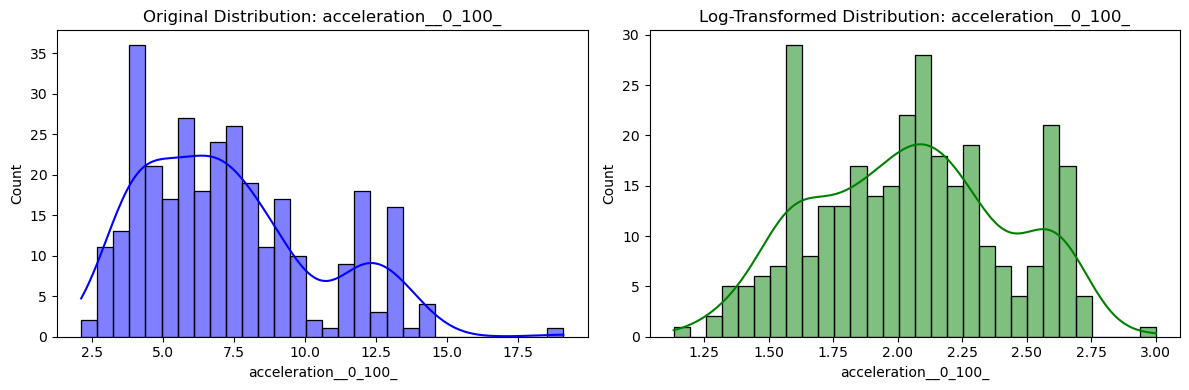

In [39]:
for i in df1.columns:
    if df1[i].dtype in ['float64', 'int64']:
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Original Distribution
        sns.histplot(df1[i], bins=30, kde=True, ax=axes[0], color='blue')
        axes[0].set_title(f'Original Distribution: {i}')
        
        # Log-Transformed Distribution
        if (df1[i] > 0).all():  # Log transform requires positive values
            sns.histplot(np.log1p(df1[i]), bins=30, kde=True, ax=axes[1], color='green')
            axes[1].set_title(f'Log-Transformed Distribution: {i}')
        else:
            axes[1].set_title(f'Cannot Log Transform: {i} (Contains Non-Positive Values)')
        
        plt.tight_layout()
        plt.show()


As some of the columns are skewed in both way so log transformation is done.

## Linear Regression - Gradient Method

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
X = df1.drop(['Price_DE_','Efficiency','Fast_charge','Top_speed','acceleration__0_100_'], axis=1)
X['log_Efficiency'] = np.log1p(df1['Efficiency'])
X['log_Fast_charge']=np.log1p(df1['Fast_charge'])
#X['log_Range']=np.log1p(df1['Range'])
X['log_Top_speed']=np.log1p(df1['Top_speed'])
X['log_acceleration__0_100_']=np.log1p(df1['acceleration__0_100_'])
y = np.log1p(df1[['Price_DE_']])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 1)

In [56]:
rm = LinearRegression()

rm.fit(X_train,y_train)

LinearRegression()

In [58]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, rm.coef_[0][idx]))

The coefficient for Battery is -0.015420332431727022
The coefficient for Range is 0.004060159601652451
The coefficient for log_Efficiency is 2.471071596005609
The coefficient for log_Fast_charge is -0.010409429480839175
The coefficient for log_Top_speed is 1.75266976539913
The coefficient for log_acceleration__0_100_ is 0.1830532358334124


In [60]:
rm.score(X_train, y_train)

0.7925433291640925

In [62]:
rm.score(X_test, y_test)

0.759286034105459

In [64]:
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Linear Regression - OLS Method

In [66]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Battery,Range,log_Efficiency,log_Fast_charge,log_Top_speed,log_acceleration__0_100_,Price_DE_
320,68.0,265,5.552960,5.673323,4.875197,2.660260,10.996099
265,45.0,225,5.303305,5.442418,4.890349,2.610070,10.808636
87,106.5,530,5.308268,6.447306,5.327876,1.589235,11.155550
234,91.0,425,5.370638,5.942799,5.303305,1.547563,11.255462
277,59.3,330,5.198497,5.442418,5.081404,2.219203,10.809546


In [70]:
X.columns

Index(['Battery', 'Range', 'log_Efficiency', 'log_Fast_charge',
       'log_Top_speed', 'log_acceleration__0_100_'],
      dtype='object')

In [72]:
lm1 = smf.ols(formula= 'Price_DE_ ~ Battery+Range+log_Efficiency+log_Fast_charge+log_Top_speed+log_acceleration__0_100_', data = data_train).fit()
print(lm1.params)

Intercept                  -11.810710
Battery                     -0.015420
Range                        0.004060
log_Efficiency               2.471072
log_Fast_charge             -0.010409
log_Top_speed                1.752670
log_acceleration__0_100_     0.183053
dtype: float64


In [74]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_DE_   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     54.12
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           5.73e-27
Time:                        01:52:44   Log-Likelihood:                 17.043
No. Observations:                  92   AIC:                            -20.09
Df Residuals:                      85   BIC:                            -2.433
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_train[['Battery', 'Range', 'log_Efficiency', 'log_Fast_charge','log_Top_speed', 'log_acceleration__0_100_']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                    Feature          VIF
0                   Battery   269.521214
1                     Range   306.352450
2            log_Efficiency  4645.004844
3           log_Fast_charge   683.606283
4             log_Top_speed  4564.968644
5  log_acceleration__0_100_   152.124801


In [80]:
lm2 = smf.ols(formula= 'Price_DE_ ~ Range+log_Efficiency+log_Top_speed', data = data_train).fit()
print(lm2.params)

Intercept        -4.134807
Range             0.001257
log_Efficiency    1.478118
log_Top_speed     1.328156
dtype: float64


In [82]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_DE_   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           8.31e-29
Time:                        01:55:18   Log-Likelihood:                 14.276
No. Observations:                  92   AIC:                            -20.55
Df Residuals:                      88   BIC:                            -10.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.1348      1.176     -3.